# 1. Imports

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Sobre o dataset

O conjunto de dados de dígitos, fornecido pelo scikit-learn (sklearn), é um conjunto de dados amplamente usado para aprendizado de máquina e tarefas de reconhecimento de padrões. Consiste em uma coleção de imagens 8x8 de dígitos manuscritos, variando de 0 a 9. Cada imagem é representada como uma matriz em tons de cinza de valores de pixel.

Esse conjunto de dados é comumente usado como referência para avaliar o desempenho de vários algoritmos de aprendizado de máquina, principalmente para tarefas de classificação de imagens. É frequentemente usado para treinar e testar modelos no campo da visão computacional e reconhecimento de padrões.

O conjunto de dados de dígitos no sklearn contém um total de 1.797 amostras, onde cada amostra representa um dígito manuscrito. Essas amostras são rotuladas com o dígito correspondente que representam, tornando-as adequadas para tarefas de aprendizado supervisionado. O conjunto de dados é dividido em duas partes: um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento contém 1.079 amostras, enquanto o conjunto de teste consiste em 719 amostras.

# 3. Carregamento da base e breve EDA

## 3.1 Base de dados

In [2]:
digits = load_digits(as_frame=True)
digits.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

## 3.2 Representação gráfica dos dígitos

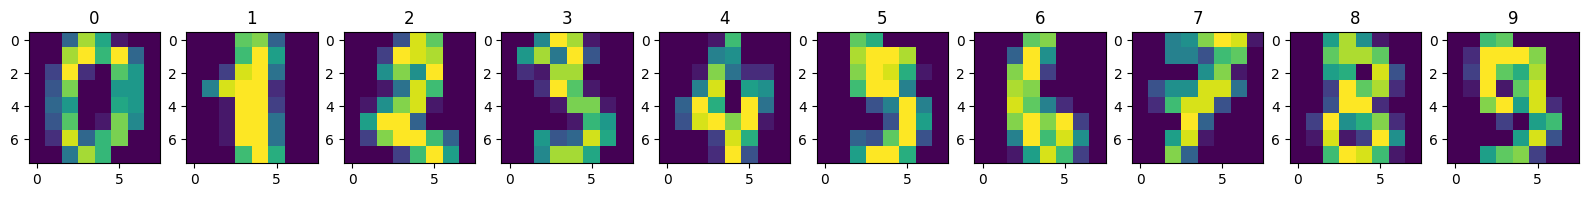

In [3]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for i in range(10):
    ax[i].imshow(digits.images[i].astype(int))
    ax[i].title.set_text(digits.target[i])

## 3.3 Histograma dos dados

Cada dígito é representado por aproximadamente 170 imagens

<Axes: xlabel='target', ylabel='count'>

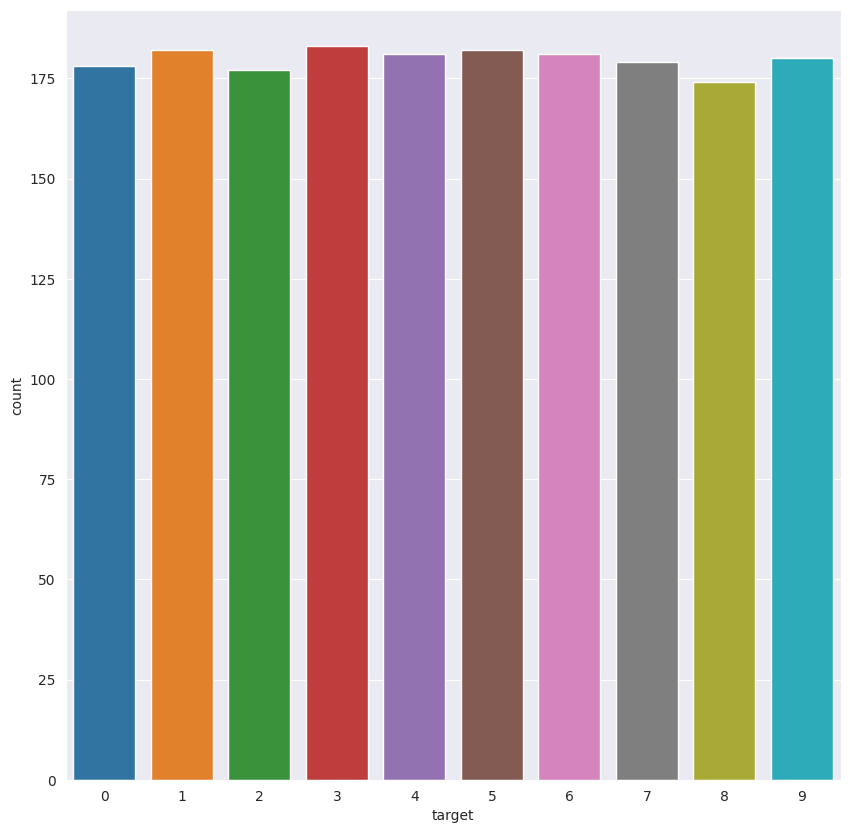

In [4]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(data=digits.frame, x='target')

# 4. Treinando o modelo

## 4.1 Divisão das bases de treino e teste

In [5]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

## 4.2 Criação do classificador e hiperparametrização com GridSearchCV

In [6]:
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'max_iter': [200, 500, 1000],
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True, False],
    'warm_start': [True, False]
}

classifier = MLPClassifier()

grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'early_stopping': False, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 1000, 'warm_start': True}
Best Score: 0.9770373596593108


## 4.3 Treinando o modelo com os melhores parâmetros

In [7]:
best_classifier = MLPClassifier(**best_params)
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)

## 4.4 Métricas de avaliação

### 4.4.1 Acurácia

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9805555555555555


### 4.4.2 Classification Report

In [9]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       1.00      0.94      0.97        34
           4       1.00      1.00      1.00        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.98      1.00      0.99        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### 4.4.3 Matriz de confusão

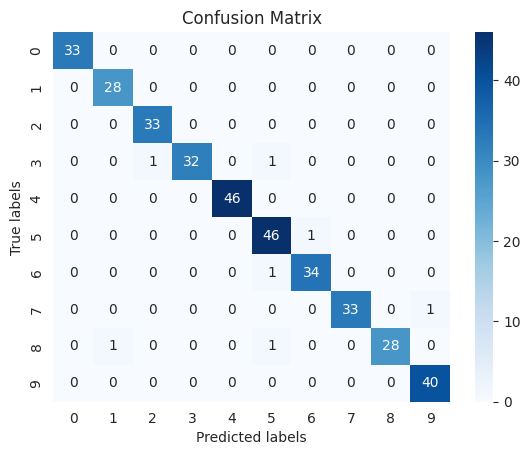

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()